In [1]:
from FADS_SRP.models import compiled_autoencoder, supervised_autoencoder, nn, lr
from FADS_SRP.input import sorted_listdir, get_dsets_
from FADS_SRP.thresholding import manhattan_plot, get_SNPs
from time import sleep
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P = "/home/shussain/Simulated_data/08112020/cSNPs_10"
dset = get_dsets_(f"{P}")

dset

/home/shussain/Simulated_data/08112020/cSNPs_10 True


{'X_train': array([[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 2, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 1, 0, 0]], dtype=int8),
 'y_train': array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]], dtype=float32),
 'X_test': array([[1, 1, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [2, 1, 0, ..., 1, 0, 0],
        ...,
        [1, 1, 0, ..., 1, 0, 0],
        [1, 0, 1, ..., 1, 0, 0],
        [2, 2, 0, ..., 1, 0, 0]], dtype=int8),
 'y_test': array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32),
 'ct':       Unnamed: 0        SNP  causal  logistic_p
 0              0      SNP_1       0    0.363150
 1              1      SNP_2       0    0.428463
 2              2      SNP_3       0    0.660492
 3              3      SNP_4  

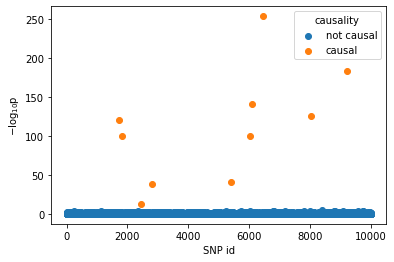

In [3]:
manhattan_plot(dset["ct"])

In [41]:
dset["X_train"].shape

(240, 1000)

In [3]:
SNPs = get_SNPs(dset["ct"], 1e-10)

In [12]:
SNPs

array([1721, 1832, 2437, 2804, 5392, 6022, 6103, 6447, 8038, 9225])

In [13]:
dset["ct"].query("causal == 1")

,Unnamed: 0,SNP,causal,logistic_p
1721,1721,SNP_1722,1,2.466468e-121
1832,1832,SNP_1833,1,1.000000e-100
2437,2437,SNP_2438,1,7.156261e-13
2804,2804,SNP_2805,1,3.805537e-39
5392,5392,SNP_5393,1,2.778712e-41
6022,6022,SNP_6023,1,1.000000e-100
6103,6103,SNP_6104,1,1.376605e-141
6447,6447,SNP_6448,1,2.812018e-254
8038,8038,SNP_8039,1,1.696465e-126
9225,9225,SNP_9226,1,4.836954e-184


In [4]:
dset["ct"].values[SNPs,]

array([[1721, 'SNP_1722', 1, 2.466468415060848e-121],
       [1832, 'SNP_1833', 1, 1e-100],
       [2437, 'SNP_2438', 1, 7.156260886733489e-13],
       [2804, 'SNP_2805', 1, 3.805537496538322e-39],
       [5392, 'SNP_5393', 1, 2.778711979773933e-41],
       [6022, 'SNP_6023', 1, 1e-100],
       [6103, 'SNP_6104', 1, 1.376605454416181e-141],
       [6447, 'SNP_6448', 1, 2.8120176703486778e-254],
       [8038, 'SNP_8039', 1, 1.6964652764621654e-126],
       [9225, 'SNP_9226', 1, 4.83695404968062e-184]], dtype=object)

In [6]:
n = [500, 1000, 3000, 6000, 10000, 12000, 16000]
aucs = []
for i in tqdm(n):
    index = np.random.randint(16000, size=i)
    hist, model = lr(dset["X_train"][index, :][:, SNPs], dset["y_train"][index, :])
    for i in hist.keys():
        if i.startswith("val_auc"):
            key = i 
            
    aucs.append(hist[key])

100%|██████████| 7/7 [05:20<00:00, 45.82s/it]


In [21]:
dset["X_train"][index, SNPs]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (500,) (10,) 

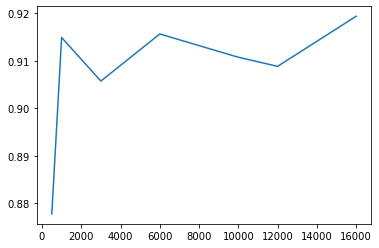

In [7]:
plt.plot(n, [k[-1] for k in aucs])

In [50]:
hist.history.keys()

dict_keys(['loss', 'auc_2', 'val_loss', 'val_auc_2'])